# Correlation (expanded)

## Pearson's correlation coefficient

Pearson’s correlation coefficient, also called Pearson’s *r* (or Pearson’s rho ($\rho$) when applied to population data) or the *Pearson product-moment sample coefficient of correlation (PPMCC)*, is a test that measures the linear correlation between two variables. The test uses standardized covariance to derive correlation.

$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} $$

The coefficient produces a value ranging from -1 to 1 where:

- -1 is a strong, inverse correlation and
- 1 is a strong, direct correlation.
- A zero-valued coefficient indicates no correlation between the two variables.

Additionally:

- *weak correlation* is generally considered to be correlation between $\pm 0.1$ and $\pm 0.3$,
- *moderate correlation* is between $\pm 0.3$ and $\pm 0.5$, and
- *strong correlation* is between $\pm 0.5$ to $\pm 1.0$.

This test is considered parametric but does not require assumptions of normal distribution or homogeneity of variance.

It is, however, required that:

- the data be independently sampled (both randomly selected and without serial correlation),
- have finite variance (such as with a distribution that has a very heavy tail)and
- be of a continuous data type.  Recall that standardization requires dividing a value by the standard deviation.

### Python: calculating Pearson's correlation coefficient

`scipy.stats.pearsonr()`

## Coefficient of determination ($r^2$ or $\rho^2$)

It's the proportion of the variance in the dependent variable that is predictable from the independent variable(s) (one variable explained by another).

It can range from 0 to 1 and it is simply the square of the Pearson correlation coefficient.

E.g., if $r = 0.8$, then $r^2 = 0.64$. This means that 64% of the variance in the dependent variable can be explained by the independent variable(s).

## Correlation vs. Causation

Correlation doesn't imply causation on its own.

Three criteria are required for inferring causal relationships:

1. **Covariation**: two variables vary together
2. **Temporal precedence**: the affected variable must vary *after* the causal variable is varied
3. **Elimination of extraneous variables**: no other variable can explain the relationship between the two variables.

Criterion #3 is the most difficult to satisfy for data we have obtained through observation alone, but easier when we can control the causal variable in an experiment.

## Correcting for Multiple Comparisons

A major issue with frequentist statistics is the issue of multiple comparisons:

- If you perform a small number of statistical tests where there is no real effect (i.e., the null hypothesis is true), then we would expect one of them to come up significant by chance alone (i.e., a false positive or Type I error).
- If you perform a hundred tests in such a circumstance, then you should expect five false positives.


The most straightforward solution is the Bonferroni correction.

Where $m$ is the number of tests performed:

$$\frac{\alpha}{m} $$



#### Example (Bonferroni correction)

Assuming:
- $\alpha = 0.05$
- $m = 10$

The significance threshold for each test would be:

$$\frac{0.05}{10} = 0.005$$

With 20 tests:

$$\frac{0.05}{20} = 0.0025$$

With 100 tests:

$$\frac{0.05}{100} = 0.0005$$

And so on.

### Examples (Pearson's correlation coefficient)

In [70]:
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd
import numpy as np

##### Example 1 (Pearson's correlation coefficient)

In [48]:
rng = np.random.default_rng()
mu1, sigma1 = 0, 1.1
normally_distributed_1 = rng.normal(mu1, sigma1, 1000)

mu2, sigma2 = 0, 0.7
normally_distributed_2 = rng.normal(mu2, sigma2, 1000)

We can see how the populations overlap:

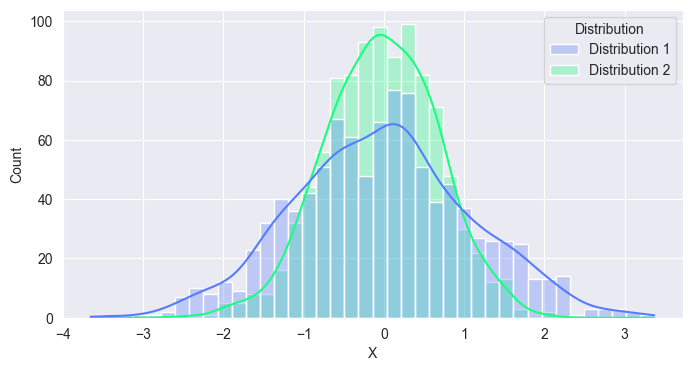

In [66]:
df_norm = pd.DataFrame({'Distribution':['Distribution 1' for i in range(len(normally_distributed_1))] + ['Distribution 2' for i in range(len(normally_distributed_2))],
                        'X':np.concatenate([normally_distributed_1, normally_distributed_2])})

plt.figure(figsize=(8,4))

palette_dict = {'Distribution 1':'#567CFF',
                'Distribution 2':'#17FF7D'}

ax = sns.histplot(data=df_norm, x="X", hue="Distribution", palette=palette_dict, fill=True, alpha=0.3, kde=True)

Now, we want to test the correlation using the `pearsonr()` function, as follows:

In [50]:
p, r = st.pearsonr(df_norm.loc[df_norm['Distribution'] == 'Distribution 1', 'X'],
                df_norm.loc[df_norm['Distribution'] == 'Distribution 2', 'X'])

print("p-value = %.4f"%p)
print("Correlation coefficient = %.4f"%r)

p-value = -0.0484
Correlation coefficient = 0.1265


The generated arrays, at the time of writing, have a p-value of 0.0009 and a correlation coefficient of 0.9766. This indicates a strong, direct correlation between the two variables.

As a visual representation, we can plot the two variables against each other:

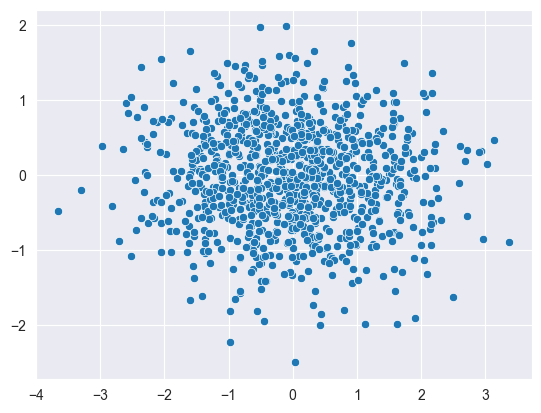

In [51]:
x =  normally_distributed_1
y =  normally_distributed_2
_ = sns.scatterplot(x=x, y=y)

Calculating the covariance manually:

In [52]:
n = len(x)
xbar, ybar = np.mean(x), np.mean(y)

product = []
for i in range(n):
    product.append((x[i]-xbar)*(y[i]-ybar))

In [53]:
cov = sum(product)/n
cov

np.float64(-0.03682549058357565)

In [54]:
r_from_cov = cov/(np.std(x)*np.std(y))
r_from_cov

np.float64(-0.048350321998262794)

To determine a $p$-value, the $t$-statistic is calculated first:

In [55]:
t = r*((n-2)/(1-r**2))**(1/2)
t

np.float64(4.029427752707331)

And then the $p$-value is calculated:

In [62]:
def p_from_t(my_t, my_n):
    return 2 * st.t.cdf(-abs(my_t), my_n-1)
p_long = p_from_t(t, n-1)

In [63]:
-np.log10(p_long)

np.float64(4.220684661043934)

Which could have been done simply by using the `pearsonr()` function:

In [33]:
st.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.0009295562793335691), pvalue=np.float64(0.9765787570101041))

##### Example 2 (Pearson's correlation coefficient)

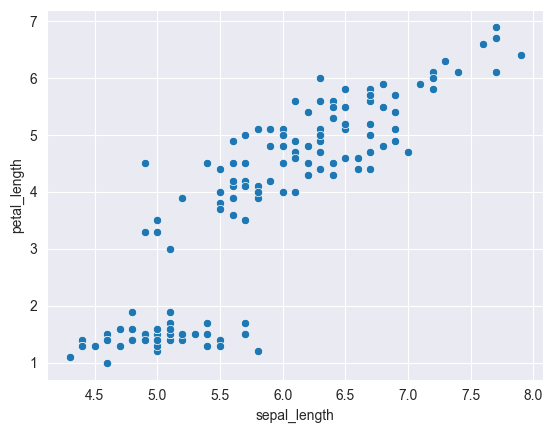

In [74]:
iris = sns.load_dataset('iris')
x = iris.sepal_length
y = iris.petal_length
_ = sns.scatterplot(x=x, y=y)

In [78]:
st.pearsonr(x, y)

PearsonRResult(statistic=np.float64(0.8717537758865831), pvalue=np.float64(1.038667419449872e-47))

In [79]:
p = 1.038667419449872e-47
-np.log10(p)

np.float64(46.98352349096034)

The r-squared, in this case, indicates that 76% of the variance in petal length can be explained by sepal length.

In [80]:
rsq = st.pearsonr(x, y)[0]**2
rsq

np.float64(0.7599546457725149)

And, for reference, here's a correlation that is not significant $\rho \approx 0$:

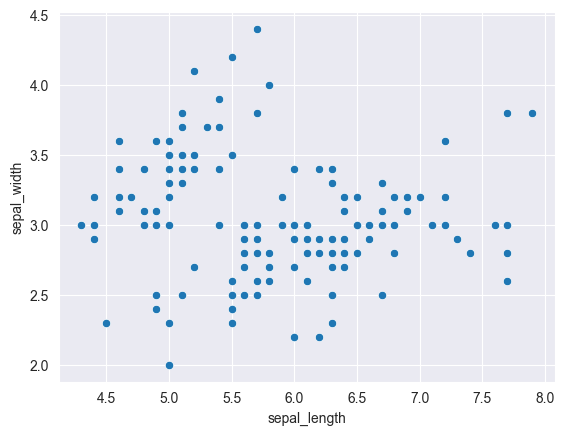

In [64]:
_ = sns.scatterplot(x=iris.sepal_length, y=iris.sepal_width)

In [65]:
st.pearsonr(iris.sepal_length, iris.sepal_width)

PearsonRResult(statistic=np.float64(-0.11756978413300204), pvalue=np.float64(0.151898260711448))

In [67]:
p = 0.151898260711448
-np.log10(p)

np.float64(0.8184471989334292)

Only 1.2% of the variance in sepal width can be explained by sepal length.

In [82]:
st.pearsonr(iris.sepal_length, iris.sepal_width)[0]**2

np.float64(0.013822654141080698)